In [1]:
import tensorflow as tf
from tensorflow import keras

2024-03-19 20:10:24.561142: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-19 20:10:24.756312: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-03-19 20:10:24.756338: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-03-19 20:10:24.802012: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-19 20:10:25.827031: W tensorflow/stream_executor/platform/de

In [2]:
from tensorflow.keras.layers import Input, LSTM, GRU, SimpleRNN, Dense, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
import pandas as pd
import os

df=pd.read_csv(os.path.join(os.getcwd(), "..", "data",'eurousd.csv'))
df.head()

,date,time,open,high,low,close,volume
0,21/10/2002,01:05:00,0.97320,0.97325,0.97280,0.97285,0
1,21/10/2002,01:10:00,0.97300,0.97320,0.97300,0.97320,0
2,21/10/2002,01:15:00,0.97320,0.97320,0.97295,0.97310,0
3,21/10/2002,01:20:00,0.97315,0.97340,0.97270,0.97270,0
4,21/10/2002,01:25:00,0.97280,0.97295,0.97260,0.97260,0


In [4]:
df['date']=pd.to_datetime(df['date'])
df=df[df['date'].dt.year>2022]
df.head()

/tmp/ipykernel_330311/2811347094.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date']=pd.to_datetime(df['date'])


,date,time,open,high,low,close,volume
1530509,2023-01-01,18:00:00,1.07037,1.07042,1.07037,1.07042,5
1530510,2023-01-01,18:05:00,1.07043,1.07046,1.07043,1.07046,4
1530511,2023-01-01,18:10:00,1.07047,1.07053,1.07047,1.07052,6
1530512,2023-01-01,18:15:00,1.07048,1.07048,1.07028,1.07028,7
1530513,2023-01-01,18:20:00,1.07025,1.07025,1.07007,1.07007,10


In [5]:
df['PrevClose'] = df['close'].shift(1)
df.head()

,date,time,open,high,low,close,volume,PrevClose
1530509,2023-01-01,18:00:00,1.07037,1.07042,1.07037,1.07042,5,NaN
1530510,2023-01-01,18:05:00,1.07043,1.07046,1.07043,1.07046,4,1.07042
1530511,2023-01-01,18:10:00,1.07047,1.07053,1.07047,1.07052,6,1.07046
1530512,2023-01-01,18:15:00,1.07048,1.07048,1.07028,1.07028,7,1.07052
1530513,2023-01-01,18:20:00,1.07025,1.07025,1.07007,1.07007,10,1.07028


In [6]:
df['Return'] = (df['close'] - df['PrevClose']) / df['PrevClose']
df['mom']=df['close'].rolling(3).mean()
df['dir']=np.where(df['Return'] < 0, 0, 1)
unique1, counts1 =np.unique(df['dir'], return_counts=True)
print(unique1, counts1)

[0 1] [43518 46723]


In [7]:
input_data = df[['close', 'mom']][2:]
targets = df['Return'].values

In [8]:
T = 10

In [9]:
Ntrain=int(len(input_data)*0.8)
print(len(input_data))
print(Ntrain)
scaler = StandardScaler()
scaler.fit(input_data[:Ntrain + T - 1])
input_data = scaler.transform(input_data)

90239
72191


In [10]:
T = 10
D = input_data.shape[1]
N = len(input_data)
print(D)

2


In [11]:
X_train = np.zeros((Ntrain, T, D))
Y_train = np.zeros(Ntrain)
print(Ntrain)
for t in range(10,Ntrain):
  print(t-T,t)
  X_train[t, :, :] = input_data[t-T:t]
  Y_train[t] = (targets[t]>0)
X_train

72191
0 10
1 11
2 12
3 13
4 14
5 15
6 16
7 17
8 18
9 19
10 20
11 21
12 22
13 23
14 24
15 25
16 26
17 27
18 28
19 29
20 30
21 31
22 32
23 33
24 34
25 35
26 36
27 37
28 38
29 39
30 40
31 41
32 42
33 43
34 44
35 45
36 46
37 47
38 48
39 49
40 50
41 51
42 52
43 53
44 54
45 55
46 56
47 57
48 58
49 59
50 60
51 61
52 62
53 63
54 64
55 65
56 66
57 67
58 68
59 69
60 70
61 71
62 72
63 73
64 74
65 75
66 76
67 77
68 78
69 79
70 80
71 81
72 82
73 83
74 84
75 85
76 86
77 87
78 88
79 89
80 90
81 91
82 92
83 93
84 94
85 95
86 96
87 97
88 98
89 99
90 100
91 101
92 102
93 103
94 104
95 105
96 106
97 107
98 108
99 109
100 110
101 111
102 112
103 113
104 114
105 115
106 116
107 117
108 118
109 119
110 120
111 121
112 122
113 123
114 124
115 125
116 126
117 127
118 128
119 129
120 130
121 131
122 132
123 133
124 134
125 135
126 136
127 137
128 138
129 139
130 140
131 141
132 142
133 143
134 144
135 145
136 146
137 147
138 148
139 149
140 150
141 151
142 152
143 153
144 154
145 155
146 156
147 157
148 158
14

13659 13669
13660 13670
13661 13671
13662 13672
13663 13673
13664 13674
13665 13675
13666 13676
13667 13677
13668 13678
13669 13679
13670 13680
13671 13681
13672 13682
13673 13683
13674 13684
13675 13685
13676 13686
13677 13687
13678 13688
13679 13689
13680 13690
13681 13691
13682 13692
13683 13693
13684 13694
13685 13695
13686 13696
13687 13697
13688 13698
13689 13699
13690 13700
13691 13701
13692 13702
13693 13703
13694 13704
13695 13705
13696 13706
13697 13707
13698 13708
13699 13709
13700 13710
13701 13711
13702 13712
13703 13713
13704 13714
13705 13715
13706 13716
13707 13717
13708 13718
13709 13719
13710 13720
13711 13721
13712 13722
13713 13723
13714 13724
13715 13725
13716 13726
13717 13727
13718 13728
13719 13729
13720 13730
13721 13731
13722 13732
13723 13733
13724 13734
13725 13735
13726 13736
13727 13737
13728 13738
13729 13739
13730 13740
13731 13741
13732 13742
13733 13743
13734 13744
13735 13745
13736 13746
13737 13747
13738 13748
13739 13749
13740 13750
13741 13751
1374

array([[[0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        ...,
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ]],

       [[0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        ...,
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ]],

       [[0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        ...,
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ]],

       ...,

       [[0.92017761, 0.92231893],
        [0.91032513, 0.91595539],
        [0.90601467, 0.91226043],
        ...,
        [0.82473172, 0.83630844],
        [0.85182604, 0.83610317],
        [0.84874714, 0.84185089]],

       [[0.91032513, 0.91595539],
        [0.90601467, 0.91226043],
        [0.90847779, 0.90836019],
        .

In [12]:
Nval=int((N-Ntrain)*0.2)
X_val=np.zeros((Nval,T,D))
Y_val=np.zeros(Nval)

for w in range(Nval):
  t=w+Ntrain
  X_val[w, :, :]=input_data[t-T:t]
  Y_val[w]=(targets[t]>0)
  print(w,t-T,t)
print(N-Ntrain+Nval)
print(N)
print(N - Ntrain)


0 72181 72191
1 72182 72192
2 72183 72193
3 72184 72194
4 72185 72195
5 72186 72196
6 72187 72197
7 72188 72198
8 72189 72199
9 72190 72200
10 72191 72201
11 72192 72202
12 72193 72203
13 72194 72204
14 72195 72205
15 72196 72206
16 72197 72207
17 72198 72208
18 72199 72209
19 72200 72210
20 72201 72211
21 72202 72212
22 72203 72213
23 72204 72214
24 72205 72215
25 72206 72216
26 72207 72217
27 72208 72218
28 72209 72219
29 72210 72220
30 72211 72221
31 72212 72222
32 72213 72223
33 72214 72224
34 72215 72225
35 72216 72226
36 72217 72227
37 72218 72228
38 72219 72229
39 72220 72230
40 72221 72231
41 72222 72232
42 72223 72233
43 72224 72234
44 72225 72235
45 72226 72236
46 72227 72237
47 72228 72238
48 72229 72239
49 72230 72240
50 72231 72241
51 72232 72242
52 72233 72243
53 72234 72244
54 72235 72245
55 72236 72246
56 72237 72247
57 72238 72248
58 72239 72249
59 72240 72250
60 72241 72251
61 72242 72252
62 72243 72253
63 72244 72254
64 72245 72255
65 72246 72256
66 72247 72257
67 72

270 72451 72461
271 72452 72462
272 72453 72463
273 72454 72464
274 72455 72465
275 72456 72466
276 72457 72467
277 72458 72468
278 72459 72469
279 72460 72470
280 72461 72471
281 72462 72472
282 72463 72473
283 72464 72474
284 72465 72475
285 72466 72476
286 72467 72477
287 72468 72478
288 72469 72479
289 72470 72480
290 72471 72481
291 72472 72482
292 72473 72483
293 72474 72484
294 72475 72485
295 72476 72486
296 72477 72487
297 72478 72488
298 72479 72489
299 72480 72490
300 72481 72491
301 72482 72492
302 72483 72493
303 72484 72494
304 72485 72495
305 72486 72496
306 72487 72497
307 72488 72498
308 72489 72499
309 72490 72500
310 72491 72501
311 72492 72502
312 72493 72503
313 72494 72504
314 72495 72505
315 72496 72506
316 72497 72507
317 72498 72508
318 72499 72509
319 72500 72510
320 72501 72511
321 72502 72512
322 72503 72513
323 72504 72514
324 72505 72515
325 72506 72516
326 72507 72517
327 72508 72518
328 72509 72519
329 72510 72520
330 72511 72521
331 72512 72522
332 7251

In [13]:
X_test = np.zeros((N - Ntrain-Nval, T, D))
Y_test = np.zeros(N - Ntrain-Nval)
for u in range(N - Ntrain- Nval):
  t = u + Ntrain+Nval
  print(t-T)
  print(u,t-T,t)
  X_test[u, :, :] = input_data[t-T:t]
  Y_test[u] = (targets[t]>0 )

75790
0 75790 75800
75791
1 75791 75801
75792
2 75792 75802
75793
3 75793 75803
75794
4 75794 75804
75795
5 75795 75805
75796
6 75796 75806
75797
7 75797 75807
75798
8 75798 75808
75799
9 75799 75809
75800
10 75800 75810
75801
11 75801 75811
75802
12 75802 75812
75803
13 75803 75813
75804
14 75804 75814
75805
15 75805 75815
75806
16 75806 75816
75807
17 75807 75817
75808
18 75808 75818
75809
19 75809 75819
75810
20 75810 75820
75811
21 75811 75821
75812
22 75812 75822
75813
23 75813 75823
75814
24 75814 75824
75815
25 75815 75825
75816
26 75816 75826
75817
27 75817 75827
75818
28 75818 75828
75819
29 75819 75829
75820
30 75820 75830
75821
31 75821 75831
75822
32 75822 75832
75823
33 75823 75833
75824
34 75824 75834
75825
35 75825 75835
75826
36 75826 75836
75827
37 75827 75837
75828
38 75828 75838
75829
39 75829 75839
75830
40 75830 75840
75831
41 75831 75841
75832
42 75832 75842
75833
43 75833 75843
75834
44 75834 75844
75835
45 75835 75845
75836
46 75836 75846
75837
47 75837 75847
75

In [14]:
i = Input(shape=(T, D))
x = LSTM(50, dropout=0.2)(i)
x=keras.layers.Dropout(0.3)(x)
#x= Dense(10, activation='relu')(x)
#x=keras.layers.Dropout(0.3)(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(learning_rate=0.001),
  metrics=['accuracy']
)

2024-03-19 20:10:33.692662: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-19 20:10:33.692815: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-03-19 20:10:33.692891: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2024-03-19 20:10:33.692953: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2024-03-19 20:10:33.693012: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

In [15]:
#es = EarlyStopping(patience=20, restore_best_weights=True)
#callbacks=[es],
history = model.fit(X_train, Y_train,
          validation_data=(X_val, Y_val),
          batch_size=32,
          epochs=40,

          verbose=1)

Epoch 1/40
2256/2256 [==============================] - 31s 13ms/step - loss: 0.0081 - accuracy: 0.0257 - val_loss: 9.6611e-06 - val_accuracy: 0.0285
Epoch 2/40
2256/2256 [==============================] - 28s 12ms/step - loss: 1.3981e-05 - accuracy: 0.0257 - val_loss: 1.4216e-06 - val_accuracy: 0.0285
Epoch 3/40
2256/2256 [==============================] - 30s 13ms/step - loss: 6.5216e-06 - accuracy: 0.0257 - val_loss: -4.2613e-07 - val_accuracy: 0.0285
Epoch 4/40
2256/2256 [==============================] - 32s 14ms/step - loss: 7.9211e-06 - accuracy: 0.0257 - val_loss: -9.4554e-07 - val_accuracy: 0.0285
Epoch 5/40
2256/2256 [==============================] - 32s 14ms/step - loss: 6.7912e-06 - accuracy: 0.0257 - val_loss: -1.0725e-06 - val_accuracy: 0.0285
Epoch 6/40
2256/2256 [==============================] - 29s 13ms/step - loss: 8.2461e-06 - accuracy: 0.0257 - val_loss: -1.0591e-06 - val_accuracy: 0.0285
Epoch 7/40
2256/2256 [==============================] - 30s 13ms/step - loss

KeyboardInterrupt: 

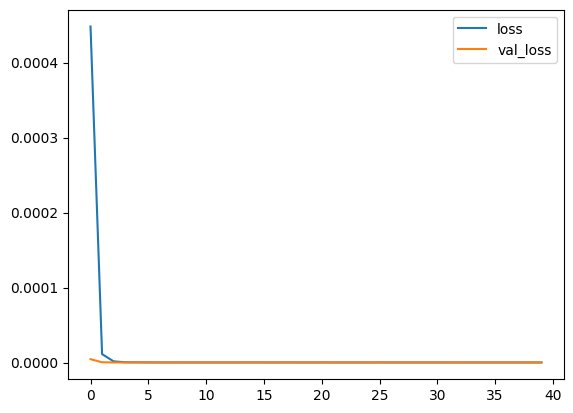

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

KeyError: 'accuracy'

In [ ]:
pred=model.predict(X_test)


452/452 [==============================] - 2s 4ms/step


In [ ]:
lstm2=model.evaluate(X_test, Y_test)

452/452 [==============================] - 2s 5ms/step - loss: 0.2057 - accuracy: 0.9092


(array([2837.,  486.,  335.,  239.,  193.,  190.,  167.,  172.,  159.,
         179.,  139.,  143.,  151.,  136.,  156.,  152.,  148.,  132.,
         155.,  152.,  145.,  136.,  138.,  130.,  136.,  126.,  131.,
         115.,  106.,  106.,   90.,  109.,  101.,   99.,  103.,  103.,
         119.,  112.,  119.,  127.,  154.,  133.,  180.,  141.,  197.,
         198.,  252.,  327.,  520., 3565.]),
 array([3.27900781e-17, 1.99999996e-02, 3.99999991e-02, 5.99999987e-02,
        7.99999982e-02, 1.00000001e-01, 1.19999997e-01, 1.40000001e-01,
        1.59999996e-01, 1.80000007e-01, 2.00000003e-01, 2.19999999e-01,
        2.39999995e-01, 2.59999990e-01, 2.80000001e-01, 3.00000012e-01,
        3.19999993e-01, 3.40000004e-01, 3.60000014e-01, 3.79999995e-01,
        4.00000006e-01, 4.19999987e-01, 4.39999998e-01, 4.60000008e-01,
        4.79999989e-01, 5.00000000e-01, 5.19999981e-01, 5.40000021e-01,
        5.60000002e-01, 5.79999983e-01, 6.00000024e-01, 6.20000005e-01,
        6.39999986e-01, 

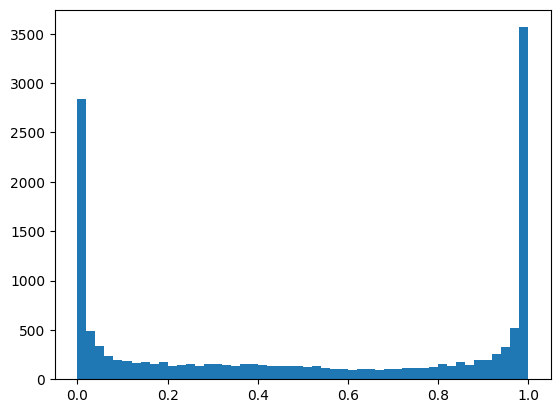

In [ ]:
plt.hist(pred , bins=50)

In [ ]:
model.save("model1.h5")

In [ ]:
pd.DataFrame(pred,Y_test)

NameError: name 'pred' is not defined